In [118]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("../../Data/cleaned_v4.csv")
dataset

,Unnamed: 0,Link,Content,Content_cleaned_v1,Length_cleaned_v1,Content_cleaned_v2,Length_cleaned_v2,Label,cc
0,0,https://baochinhphu.vn/thong-diep-3-diem-cua-v...,"Từ ngày 12-13/5/2023 tại Dhaka, Bangladesh đã ...",từ ngày tại dhaka bangladesh đã diễn ra hội_ng...,476,dhaka bangladesh diễn hội_nghị ấn_độ_dương ind...,324,Chinh tri,"Từ ngày 12 - 13 / 5 / 2023 tại Dhaka , Banglad..."
1,1,https://baochinhphu.vn/thu-tuong-pham-minh-chi...,Cùng tham dự cuộc tiếp xúc cử tri có các đại b...,cùng tham_dự cuộc tiếp_xúc cử_tri có các đại_b...,292,cùng tham_dự cuộc tiếp_xúc cử_tri đại_biểu quố...,226,Chinh tri,Cùng tham_dự cuộc tiếp_xúc cử_tri có các đại_b...
2,2,https://baochinhphu.vn/chu-tich-nuoc-du-le-pha...,Buổi lễ được tổ chức bằng hình thức trực tiếp ...,buổi lễ được tổ_chức bằng hình_thức trực_tiếp ...,612,buổi lễ tổ_chức bằng hình_thức trực_tiếp kết_h...,434,Chinh tri,Buổi lễ được tổ_chức bằng hình_thức trực_tiếp ...
3,3,https://baochinhphu.vn/loi-day-cua-bac-dang-du...,"Chiều 12/5, Tỉnh ủy Nam Định tổ chức Hội thảo ...",chiều tỉnh_ủy nam_định tổ_chức hội_thảo khoa_h...,529,chiều tỉnh_ủy nam_định tổ_chức hội_thảo khoa_h...,391,Chinh tri,"Chiều 12 / 5 , Tỉnh_ủy Nam_Định tổ_chức Hội_th..."
4,4,https://baochinhphu.vn/de-nghi-boeing-tich-cuc...,"Tại buổi tiếp, Thủ tướng Phạm Minh Chính nhắc ...",tại buổi tiếp thủ_tướng phạm_minh_chính nhắc l...,660,buổi tiếp thủ_tướng phạm_minh_chính nhắc cuộc ...,434,Chinh tri,"Tại buổi tiếp , Thủ_tướng Phạm_Minh_Chính nhắc..."
...,...,...,...,...,...,...,...,...,...
13637,13757,https://plo.vn/sap-xu-12-cuu-can-bo-o-dong-nai...,"Theo dự kiến, ngày 22-5 tới đây, TAND tỉnh Đồn...",theo dự_kiến ngày tới đây tand tỉnh đồng_nai s...,682,dự_kiến tới đây tand tỉnh đồng_nai mở phiên sơ...,519,Phap luat,"Theo dự_kiến , ngày 22 - 5 tới đây , TAND tỉnh..."
13638,13758,https://plo.vn/vien-kiem-sat-thu-ky-cua-hoang-...,"Chiều 15-2, TAND TP.HCM tiếp tục xử sơ thẩm vụ...",chiều tand tp hcm tiếp_tục xử sơ_thẩm vụ án vi...,411,chiều tand tp hcm tiếp_tục xử sơ_thẩm vụ án vi...,276,Phap luat,"Chiều 15 - 2 , TAND TP. HCM tiếp_tục xử sơ_thẩ..."
13639,13759,https://plo.vn/hotgirl-tina-duong-bi-phat-11-n...,"Chiều 9-6, TAND tỉnh Bình Thuận đã tuyên phạt ...",chiều tand tỉnh bình_thuận đã tuyên_phạt bị_cá...,313,chiều tand tỉnh bình_thuận tuyên_phạt bị_cáo n...,226,Phap luat,"Chiều 9 - 6 , TAND tỉnh Bình_Thuận đã tuyên_ph..."
13640,13760,https://plo.vn/tand-tp-ca-mau-xin-loi-nguoi-bi...,"Chiều 2-3, TAND TP Cà Mau tổ chức buổi xin lỗi...",chiều tand tp cà_mau tổ_chức buổi xin_lỗi ngườ...,661,chiều tand tp cà_mau tổ_chức buổi xin_lỗi oan ...,449,Phap luat,"Chiều 2 - 3 , TAND TP Cà_Mau tổ_chức buổi xin_..."


In [119]:
from gensim.models import Word2Vec, KeyedVectors
w2v = Word2Vec.load("../../FeatureEngineering/Vectorize/models/w2vmodel_skip.model")

In [120]:
# w2v = KeyedVectors.load_word2vec_format("../../Data/baomoi.window2.vn.model.bin.gz", binary=True)

In [121]:
from keras_preprocessing.text import Tokenizer
from keras_preprocessing import sequence
from keras_preprocessing.sequence import pad_sequences

import numpy as np

tokenizer = Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
# label_tokenizer = Tokenizer()
# label_tokenizer.fit_on_texts(dataset["Label"])
# token_label_seq = np.array(label_tokenizer.texts_to_sequences(dataset['Label']))
tokenizer.fit_on_texts(dataset['Content_cleaned_v2'])
sequences = tokenizer.texts_to_sequences(dataset['Content_cleaned_v2'])

maxlen = 350
X = sequence.pad_sequences(sequences, maxlen=maxlen)
Y = pd.get_dummies(dataset['Label'])

In [122]:
X[:10]

array([[   0,    0,    0, ...,   14, 1256, 6692],
       [   0,    0,    0, ...,  175, 1527, 4726],
       [ 286, 3287,  546, ..., 1615,  113, 2086],
       ...,
       [  62,  843,  635, ...,  173,  403, 6543],
       [   0,    0,    0, ...,  644, 3428, 4726],
       [ 158,  144,  195, ...,  105, 1117, 4726]])

In [123]:
Y

,Chinh tri,Giai tri,Giao duc,Khoa hoc,Kinh te,Phap luat,Suc khoe,The thao,Van hoa
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
13637,0,0,0,0,0,1,0,0,0
13638,0,0,0,0,0,1,0,0,0
13639,0,0,0,0,0,1,0,0,0
13640,0,0,0,0,0,1,0,0,0


In [124]:
import numpy as np
notin = []
embedding_dim = 128
word_index = tokenizer.word_index
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))
print('num_words:', num_words)
for word, i in word_index.items():
    if word in w2v.wv.key_to_index:
            embedding_matrix[i] = w2v.wv[word]
    else:
        notin.append(word)

num_words: 43216


In [125]:
len([i for i in embedding_matrix if np.mean(i) != 0]), len(notin)

(42010, 1205)

In [126]:
two = []
one = []
more = []
for i in notin:
  leng = len(i.split('_'))
  if leng == 2:
    two.append(i)
    continue
  if leng == 1:
    one.append(i)
    continue
  more.append(i)

In [127]:
len(one), len(two), len(more)

(344, 454, 407)

In [128]:
"|".join(one)

'truc|tiep|dab|ottservices|livetv|nsj|vlncn|bangiaoduc|carina|ttgt|idt|sejco|pắk|kenmark|blttds|sek|catvanloi|biva|gcn|vl|mãng|petrotimes|sullivan|xettuyen|htpl|staker|ccb|bavico|ltvl|ky|kien|yokogold|banvanhoa|truyen|haiqal|azmi|nht|xiếu|byă|tkđdđt|boon|ccv|qdnd|thisinh|duc|ptit|sú|rina|vietjetair|baogia|pinnock|bunchhai|sinti|ajmal|bqtđđcv|sadeco|đkđđ|cqthtt|klđt|đăkđrinh|nts|tvhk|toasoan|tuyen|phap|luat|vinfutureprize|khonggianmang|including|souttar|norgaard|dimong|guehi|chatmongkol|jakkrapong|z30d|hía|hoclamgiau|hth|676m2|81c|zachary|everfarm|gcnqsdđ|bllđ|codion|thitotnghiepthpt|tsdaucap|tuyensinhdaucap|hoc|forms|gle|diem|kp5|sys|qt08|tiengtrungtimesvn|28a|n11|isvnu|chinhphu|vivita|nhathuocthanthien|otoxemay|ccht|hz|laos|admin|chuyen|mta|congdong|whitechic|mazraoui|rublico|amirul|schlotterbeck|esport|sokmeng|donnell|popovic|rawlins|acerbi|ayew|konsa|sokry|stephens|rothwell|quoc|hsst|ehome|hngđ|ltthc|mt5|chv|medicosult|tnmt|thongvang|a10|bot31|tnhs|evncpc|huong|vbqppl|barite|liêt|so

In [129]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM, Bidirectional, Dropout

model1 = Sequential()
model1.add(Embedding(num_words, embedding_dim, input_length=maxlen ,weights=[embedding_matrix],trainable=False))
model1.add(Bidirectional(LSTM(units=64, return_sequences= True)))
model1.add(Dropout(0.2))
model1.add(Bidirectional(LSTM(units=128, return_sequences= False)))
model1.add(Dropout(0.2))
model1.add(Dense(units=128, activation='relu'))
model1.add(Dense(units=32, activation='relu'))
# model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(9, activation='softmax')) 
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 350, 128)          5531648   
                                                                 
 bidirectional_6 (Bidirectio  (None, 350, 128)         98816     
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 350, 128)          0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 256)              263168    
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7, random_state=42)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((9549, 350), (9549, 9), (4093, 350), (4093, 9))

In [131]:
# from keras.callbacks import EarlyStopping
# callback1 = EarlyStopping(monitor = "val_accuracy", patience= 4)
# callback2 = EarlyStopping(monitor = "val_loss", patience= 4)

In [132]:
model1.fit(X_train, Y_train, validation_split=0.1, epochs= 50)

Epoch 1/50
269/269 [==============================] - 158s 570ms/step - loss: 0.2818 - accuracy: 0.3818 - val_loss: 0.2162 - val_accuracy: 0.5906
Epoch 2/50
269/269 [==============================] - 139s 516ms/step - loss: 0.1982 - accuracy: 0.6068 - val_loss: 0.1490 - val_accuracy: 0.7236
Epoch 3/50
269/269 [==============================] - 139s 518ms/step - loss: 0.1980 - accuracy: 0.6271 - val_loss: 0.1544 - val_accuracy: 0.7089
Epoch 4/50
269/269 [==============================] - 142s 526ms/step - loss: 0.1552 - accuracy: 0.7207 - val_loss: 0.1338 - val_accuracy: 0.7602
Epoch 5/50
269/269 [==============================] - 142s 527ms/step - loss: 0.1271 - accuracy: 0.7787 - val_loss: 0.1040 - val_accuracy: 0.8220
Epoch 6/50
269/269 [==============================] - 141s 526ms/step - loss: 0.1070 - accuracy: 0.8238 - val_loss: 0.0982 - val_accuracy: 0.8377
Epoch 7/50
269/269 [==============================] - 142s 528ms/step - loss: 0.1002 - accuracy: 0.8324 - val_loss: 0.0956 -

In [ ]:
model1.save('lstm2.h5')

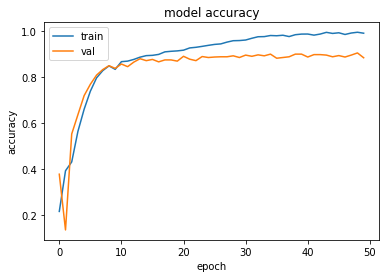

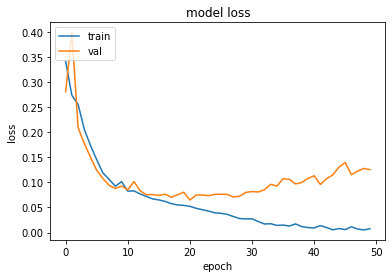

In [ ]:
from matplotlib import pyplot as plt
plt.plot(model1.history.history['accuracy'])
plt.plot(model1.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
from matplotlib import pyplot as plt
plt.plot(model1.history.history['loss'])
plt.plot(model1.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
loss, accuracy = model1.evaluate(X_test, Y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

128/128 [==============================] - 33s 261ms/step - loss: 0.1287 - accuracy: 0.8832
Test Loss: 0.12874124944210052
Test Accuracy: 0.8832152485847473


In [ ]:
y_pred = model1.predict(X_test)

128/128 [==============================] - 35s 262ms/step


In [ ]:
# predicted = y_pred.argmax(axis=1)

In [ ]:
# true_labels = Y_test.values.argmax(axis=1)

In [ ]:
# true_labels

In [ ]:
# predicted

In [ ]:
# arr_wrong = []
# for i, v in enumerate(predicted):
#   if v != true_labels[i]:
#     arr_wrong.append(i)

In [ ]:
# arr_true = []
# for i, v in enumerate(predicted):
#   if v == true_labels[i]:
#     arr_true.append(i)

In [ ]:
# w = tokenizer.sequences_to_texts(predicted[arr_wrong])

In [ ]:
# t = tokenizer.sequences_to_texts(true_labels[arr_true])

In [ ]:
# length_w = pd.Series(sorted([len(l.split()) for l in w]))

In [ ]:
# length_t = pd.Series(sorted([len(l.split()) for l in t]))

In [ ]:
# len(length_w)

In [ ]:
# len(length_t)

In [ ]:
# length_t.plot()

In [ ]:
# length_w.plot()

In [ ]:
# len(length_w[length_w.values < 50])

In [ ]:
# len(length_t[length_t.values < 50])

In [ ]:
# y_pred[arr_wrong]

In [ ]:
# predicted[arr_wrong]

In [ ]:
# true_labels[arr_wrong]

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def heatconmat(y_pred, y_test):
  plt.figure(figsize=(10,8))
  cnf_matrix = confusion_matrix(y_pred, y_test)
  ax = sns.heatmap(cnf_matrix, annot=True, fmt='', cmap='Blues')
  ax.xaxis.set_ticklabels(list(set(data[])))
  ax.yaxis.set_ticklabels(list(set(y_test)))
  plt.show()
heatconmat(predicted, true_labels)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3809249309.py, line 8)

In [ ]:
# check = pd.read_csv("../MachineLearning/.svm_predict.csv")
# se_check = tokenizer.texts_to_sequences(check['content'])

# maxlen = 300
# x_check = sequence.pad_sequences(se_check, maxlen=maxlen)

In [ ]:
# check_pred = model1.predict(x_check)

In [ ]:
# Y.columns

In [ ]:
# arr_wrong[40:50], check_pred[arr_wrong][40:50]

In [ ]:
# check_test = pd.get_dummies(check['true label'])

In [ ]:
# model1.evaluate(x_check, test_check)